In [1]:
#static run with regulators
from pathlib import Path
import PowerSystemClasses as ps
import opendssdirect as dss

def static_sim():
    Dnetwork = ps.DistNetwork()

    components = {'nodes': Path('..', 'network-data', 'nodes.csv'),
              'line_geos': Path('..', 'network-data', 'LineGeometry.csv'),
              'wire_data': Path('..', 'network-data', 'WireData.csv'),
              'CN_data': Path('..', 'network-data', 'CNData.csv'),
              'lines': Path('..', 'network-data', 'lines.csv'),
              'loads': Path('..', 'network-data', 'loads.csv'),
              'xfmrs': Path('..', 'network-data', 'xfmrs.csv'),
              'regs': Path('..', 'network-data', 'regs.csv'),
              'PV': Path('..', 'network-data', 'PV.csv'),
              'circuit': Path('..', 'network-data', 'circuit.csv')}
    
    Dnetwork.add_circuit(components['circuit'])
    Dnetwork.add_nodes(components['nodes'])
    Dnetwork.add_line_geoms(components['line_geos'])
    Dnetwork.add_wiredata(components['wire_data'])
    Dnetwork.add_CNdata(components['CN_data'])
    Dnetwork.add_lines(components['lines'])
    Dnetwork.add_xfmrs(components['xfmrs'])

    Dnetwork.calc_Vbases()

    Dnetwork.add_regulators(components['regs'])
    Dnetwork.add_loads(components['loads'])
    Dnetwork.add_PV(components['PV'])
    

    Dnetwork.calc_electrical_distance()
        
    Dnetwork.check_floating_lines()

    Dnetwork.compile_DSS(incl_regs=True)
    sub_meter = ps.Meter(circ_element='Transformer', bus1='src_node', bus2='n0')
    sub_meter.to_DSS()

    Dnetwork.solve_DSS()
    Dnetwork.record_DSS_bus_voltages()
    return Dnetwork
    

DN = static_sim()

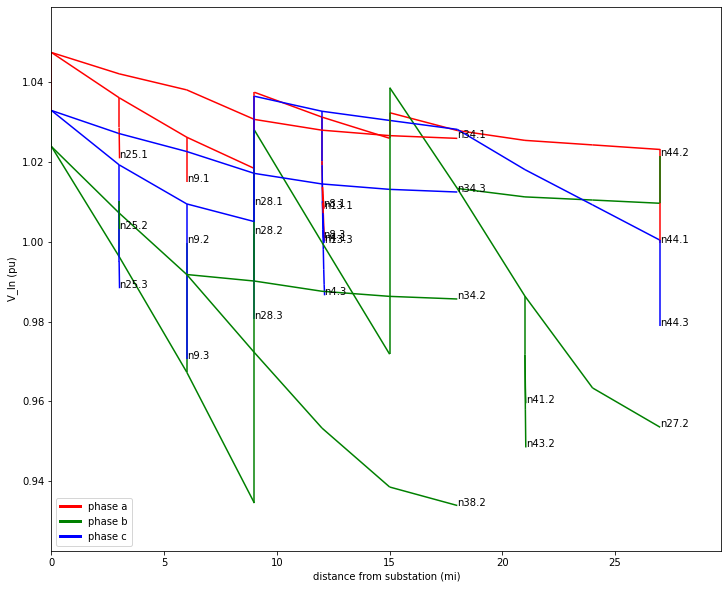

In [2]:
#static bus voltages with regulators
DN.plot_bus_voltages()

In [4]:
DN.nodes['n16']

{'coords': (3, 8),
 'hot_terminals': {1, 2, 3},
 'voltage': [          Vmag        Vang       Vpu    Vpu_dss
  1  7494.646397  -32.323781  1.040987  62.409175
  2  7412.870497 -154.881619  1.029629  61.728213
  3  7485.259587   87.372800  1.039683  62.331009],
 'Vln_base': 7199.557856794635,
 'load': <PowerSystemClasses.Load at 0x7fbbea065d30>,
 'dist_from_source': 9.0}

In [1]:
# 1-week QSTS
import pandas as pd
from pathlib import Path
import PowerSystemClasses as ps
import opendssdirect as dss

def QSTS():
    Dnetwork = ps.DistNetwork()

    components = {'nodes': Path('..', 'network-data', 'nodes.csv'),
              'line_geos': Path('..', 'network-data', 'LineGeometry.csv'),
              'wire_data': Path('..', 'network-data', 'WireData.csv'),
              'CN_data': Path('..', 'network-data', 'CNData.csv'),
              'lines': Path('..', 'network-data', 'lines.csv'),
              'loads': Path('..', 'network-data', 'loads.csv'),
              'xfmrs': Path('..', 'network-data', 'xfmrs.csv'),
              'regs': Path('..', 'network-data', 'regs.csv'),
              'circuit': Path('..', 'network-data', 'circuit.csv')}
    
    Dnetwork.add_circuit(components['circuit'])
    Dnetwork.add_nodes(components['nodes'])
    Dnetwork.add_line_geoms(components['line_geos'])
    Dnetwork.add_wiredata(components['wire_data'])
    Dnetwork.add_CNdata(components['CN_data'])
    Dnetwork.add_lines(components['lines'])
    Dnetwork.add_xfmrs(components['xfmrs'])

    Dnetwork.calc_Vbases()

    Dnetwork.add_loads(components['loads'])
    Dnetwork.add_regulators(components['regs'])

    Dnetwork.calc_electrical_distance()
        
    Dnetwork.check_floating_lines()

    loads_path = Path('..', 'network-data', 'load_profiles.csv')
    load_profiles = pd.read_csv(loads_path, parse_dates=['datetime'],index_col='datetime')
    load_profiles = load_profiles.resample('1min').interpolate()
    #load_profiles = load_profiles.iloc[:500,]
    Dnetwork.assign_random_load_profile(load_profiles)

    Dnetwork.compile_DSS(incl_regs=True)
    sub_meter = ps.Meter(circ_element='Transformer', bus1='src_node', bus2='n0')
    sub_meter.to_DSS()

    Dnetwork.run_DSS_load_profile(load_profiles.index)

    return Dnetwork

DN_QSTS = QSTS()



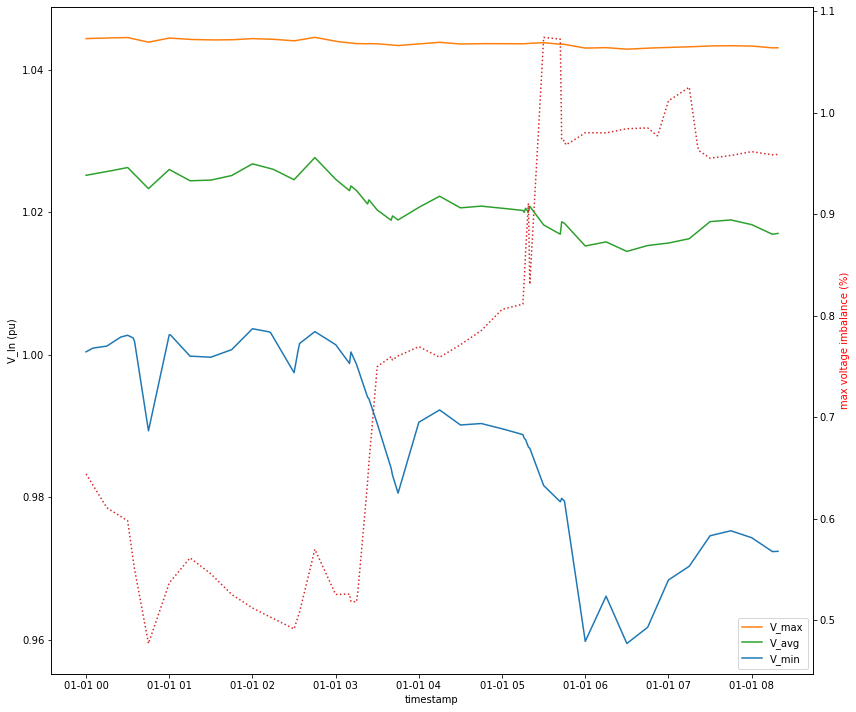

In [2]:
DN_QSTS.plt_ts_voltages()

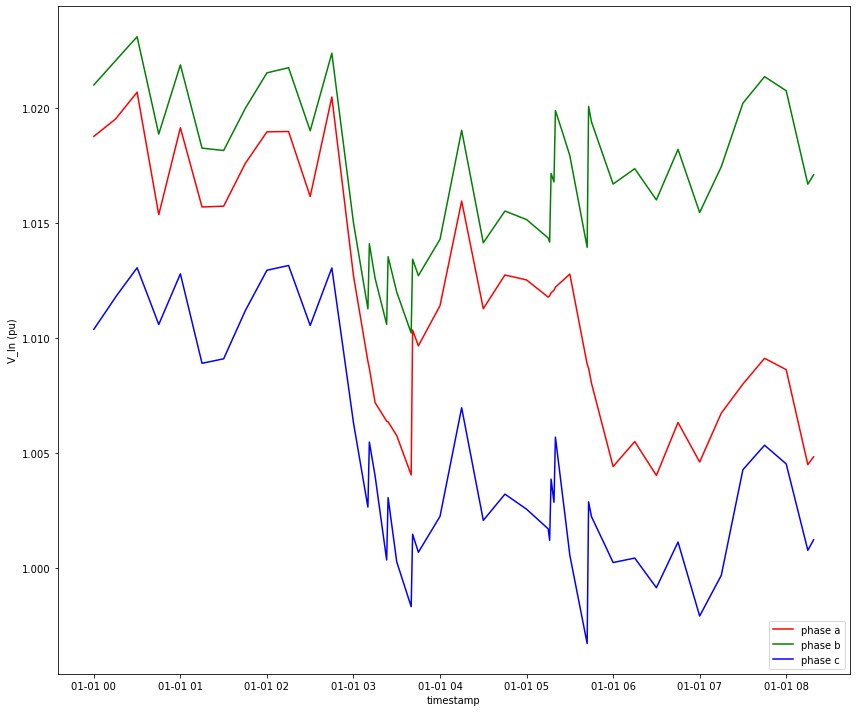

In [3]:
DN_QSTS.plt_bus_ts('n44')

In [4]:
dss.utils.loads_to_dataframe()

,CVRCurve,CVRvars,CVRwatts,CFactor,Class,Growth,IsDelta,Model,Name,NumCust,...,kV,kW,kVABase,kvar,kWh,kWhDays,puSeriesRL,XfkVA,Phases,AllocationFactor
load_n2,,2.0,1.0,4.0,1,,True,1,load_n2,1,...,0.240178,0.754308,0.784492,0.215517,0.0,30.0,50.0,0.0,2,0.5
load_n3,,2.0,1.0,4.0,1,,True,1,load_n3,1,...,0.240178,2.261493,2.383823,0.753831,0.0,30.0,50.0,0.0,2,0.5
load_n4,,2.0,1.0,4.0,1,,True,1,load_n4,1,...,0.240178,5.777704,6.032101,1.733311,0.0,30.0,50.0,0.0,2,0.5
load_n8,,2.0,1.0,4.0,1,,True,1,load_n8,1,...,0.240178,7.628222,8.215846,3.051289,0.0,30.0,50.0,0.0,2,0.5
load_n9,,2.0,1.0,4.0,1,,True,1,load_n9,1,...,0.416,19.434618,20.931724,7.773847,0.0,30.0,50.0,0.0,3,0.5
load_n11,,2.0,1.0,4.0,1,,True,1,load_n11,1,...,0.240178,1.525644,1.572598,0.381411,0.0,30.0,50.0,0.0,2,0.5
load_n12,,2.0,1.0,4.0,1,,True,1,load_n12,1,...,0.240178,2.288467,2.412256,0.762822,0.0,30.0,50.0,0.0,2,0.5
load_n13,,2.0,1.0,4.0,1,,True,1,load_n13,1,...,0.240178,1.208658,1.301764,0.483463,0.0,30.0,50.0,0.0,2,0.5
load_n16,,2.0,1.0,4.0,1,,False,1,load_n16,1,...,12.47,5.260576,5.313984,0.751511,0.0,30.0,50.0,0.0,3,0.5
load_n18,,2.0,1.0,4.0,1,,False,1,load_n18,1,...,12.47,13.558127,14.776354,5.875188,0.0,30.0,50.0,0.0,3,0.5
